In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]]


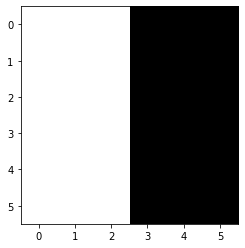

In [4]:
img1 = np.array([[1,1,1,0,0,0]]*6)
print(img1)
plt.imshow(img1 , cmap='gray')

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


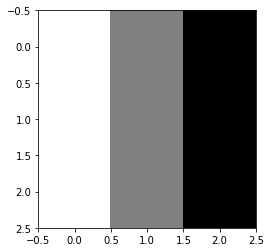

In [7]:
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print(kernel)
plt.imshow(kernel, cmap='gray')

In [10]:
feature_map = np.zeros((img1.shape[0] - kernel.shape[0] + 1, img1.shape[0] - kernel.shape[0] + 1 ))   
print(feature_map.shape)

(4, 4)


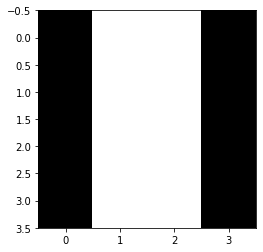

In [18]:
for i in range (feature_map.shape[0]):
    for j in range (feature_map.shape[0]):
        feature_map[i,j] = np.sum(img1[i: i+ kernel.shape[0] , j:j+kernel.shape[0]] * kernel)

plt.imshow(feature_map, cmap='gray')

In [22]:
hor_kernel = kernel.transpose()
print(hor_kernel)


[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


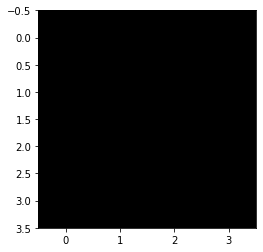

In [23]:
for i in range (feature_map.shape[0]):
    for j in range (feature_map.shape[0]):
        feature_map[i,j] = np.sum(img1[i: i+ hor_kernel.shape[0] , j:j+hor_kernel.shape[0]] * hor_kernel)

plt.imshow(feature_map, cmap='gray')

In [25]:
print(feature_map)
#no feature detected

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [28]:
#custom function for convolution
def convolution(image , filter):
    output = np.zeros((image.shape[0] - filter.shape[0]+1,image.shape[0] - filter.shape[0]+1) )
    for i in range (output.shape[0]):
        for j in range (output.shape[0]):
            output[i,j] = np.sum(img1[i: i+ filter.shape[0] , j:j+filter.shape[0]] * filter)

    return output

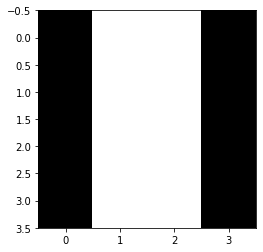

In [31]:
plt.imshow(convolution(img1, kernel), cmap='gray')

full padding : output size > input size
same padding : output size = input size
valid padding : no padding

Building a sample cnn network 

In [2]:
from keras import layers
from tensorflow import keras

model = keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (64,64,3), strides=(2,2) ,padding='same'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_data,train_label), (test_data,test_label) = mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [5]:
train_data.shape

(60000, 28, 28)

In [31]:
test_label.shape

(10000, 10, 2)

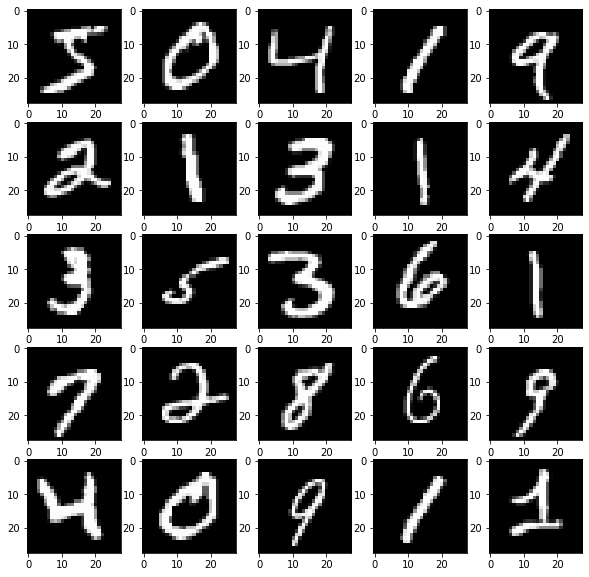

In [12]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i],cmap='gray')

In [16]:
train_data = train_data.reshape((60000,28,28,1)).astype('float32')/255
test_data = test_data.reshape((10000,28,28,1)).astype('float32')/255

In [18]:
from keras.utils import to_categorical
test_label = to_categorical(test_label)
train_label = to_categorical(train_label)

In [33]:
model_cnn=keras.Sequential()
model_cnn.add(layers.Conv2D(32,(3,3),input_shape=(28,28,1)))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128,activation='relu'))
model_cnn.add(layers.Dense(10,activation='softmax'))
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [34]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
plt.figure(fig_size=(10,10))
plt.plot(history)

In [35]:
history = model_cnn.fit(train_data,train_label,epochs=10, validation_split=0.2)

Epoch 1/10
 771/1500 [==============>...............] - ETA: 28s - loss: 2.3017 - accuracy: 0.1138

KeyboardInterrupt: 